In [3]:
import findspark
findspark.init()

In [145]:
import numpy as np
import pyspark
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import *
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, to_timestamp, unix_timestamp, to_date, to_date, col, year, month

In [6]:
spark = pyspark.sql.SparkSession.builder.master("local").getOrCreate()
spark

21/12/07 15:47:55 WARN Utils: Your hostname, LAPTOP-T2T1G8JL resolves to a loopback address: 127.0.1.1; using 172.22.10.85 instead (on interface eth0)
21/12/07 15:47:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/07 15:47:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/12/07 15:47:58 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
21/12/07 15:47:58 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
21/12/07 15:47:58 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
21/12/07 15:47:58 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


In [43]:
# Let's define our schema
schema = StructType([\
    StructField("date", DateType(), True),\
    StructField("time", StringType(), True),\
    StructField("company", StringType(), True),\
    StructField("level", StringType(), True),\
    StructField("title", StringType(), True),\
    StructField("totalyearlycompensation", IntegerType(), False),\
    StructField("location", StringType(), True),\
    StructField("yearsofexperience", FloatType(), False),\
    StructField("yearsatcompany", FloatType(), False),\
    StructField("tag", StringType(), True),\
    StructField("basesalary", IntegerType(), False),\
    StructField("stockgrantvalue", IntegerType(), False),\
    StructField("bonus", IntegerType(), False),\
    StructField("gender", StringType(), True),\
    StructField("cityid", StringType(), True),\
    StructField("dmaid", StringType(), True),\
    StructField("race", StringType(), True),\
    StructField("education", StringType(), True)])

# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("csv")\
    .option("header", "false")\
    .option("delimiter", "\t")\
    .schema(schema)\
    .load("data/seperated_time_data/cleaned.txt")
data.show(n=5)

+----------+--------+---------+-----+--------------------+-----------------------+-----------------+-----------------+--------------+---+----------+---------------+-----+------+------+-----+----+---------+
|      date|    time|  company|level|               title|totalyearlycompensation|         location|yearsofexperience|yearsatcompany|tag|basesalary|stockgrantvalue|bonus|gender|cityid|dmaid|race|education|
+----------+--------+---------+-----+--------------------+-----------------------+-----------------+-----------------+--------------+---+----------+---------------+-----+------+------+-----+----+---------+
|2017-06-07|   11:33|   ORACLE|   L3|     Product Manager|                 127000| Redwood City, CA|              1.5|           1.5| NA|    107000|          20000|10000|    NA|  7392|  807|  NA|       NA|
|2017-06-10|   17:11|     EBAY| SE 2|   Software Engineer|                 100000|San Francisco, CA|              5.0|           3.0| NA|    141907|              0|    0|    NA

# Short Analysis by Gender

In [32]:
genders = ["Male", "Female", "Other"]

# filter dataset where gender is NA
filtered_data = data.filter(data["gender"].isin(genders))

In [34]:
# show how many of each gender are present in the group
filtered_data.groupby("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|Female| 6999|
| Other|  400|
|  Male|35702|
+------+-----+



In [33]:
# showing average salary per gender
salary_per_gender = filtered_data.groupby("gender").mean("basesalary")
rounded_avg_salary_per_gender = salary_per_gender.withColumn("avg(basesalary)", F.round(salary_per_gender["avg(basesalary)"], 2))
rounded_avg_salary_per_gender.show()

+------+---------------+
|gender|avg(basesalary)|
+------+---------------+
|Female|      136986.15|
| Other|      150273.96|
|  Male|      139522.83|
+------+---------------+



In [29]:
# showing average bonus per gender
bonus_per_gender = filtered_data.groupby("gender").mean("bonus")
rounded_avg_bonus_per_gender = bonus_per_gender.withColumn("avg(bonus)", F.round(bonus_per_gender["avg(bonus)"], 2))
rounded_avg_bonus_per_gender.show()

+------+----------+
|gender|avg(bonus)|
+------+----------+
|Female|  17200.59|
| Other|   23435.0|
|  Male|  19395.31|
+------+----------+



In [28]:
filtered_data.groupby("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|Female| 6999|
| Other|  400|
|  Male|35702|
+------+-----+



# Short Analysis by Ethnicity

In [40]:
# filter dataset where gender is NA
filtered_ethnic_data = data.filter(data["race"]!="NA")

filtered_ethnic_data.groupby('race').mean('basesalary').show()

+-----------+------------------+
|       race|   avg(basesalary)|
+-----------+------------------+
|Two Or More|137812.18905472636|
|      White| 139939.4920318725|
|      Black|131549.27536231885|
|   Hispanic|   132629.76085031|
|      Asian| 129829.1709140333|
+-----------+------------------+



In [41]:
# showing average salary per race
salary_per_race = filtered_ethnic_data.groupby('race').mean('basesalary')
rounded_avg_salary_per_race = salary_per_race.withColumn("avg(basesalary)", F.round(salary_per_race["avg(basesalary)"], 2))
rounded_avg_salary_per_race.show()

In [42]:
# showing average bonus per gender
bonus_per_race = filtered_data.groupby("gender").mean("bonus")
rounded_avg_bonus_per_gender = bonus_per_gender.withColumn("avg(bonus)", F.round(bonus_per_gender["avg(bonus)"], 2))
rounded_avg_bonus_per_gender.show()

+-----------+---------------+
|       race|avg(basesalary)|
+-----------+---------------+
|Two Or More|      137812.19|
|      White|      139939.49|
|      Black|      131549.28|
|   Hispanic|      132629.76|
|      Asian|      129829.17|
+-----------+---------------+



## Including date and year

In [94]:
# data.select(F.date_format('date','yyyy-MM-dd').alias('day')).groupby('day').count().show()

## Plotting Average Salaries per Gender grouped by Month

In [104]:
# Creating two new columns for year and month (to allow us to group by month)

adjustedDf = data.withColumn("date", to_date(col("date"), "yyyy-MM-dd"))\
    .withColumn('month', month("date"))

adjustedDf2 = adjustedDf.withColumn("date", to_date(col("date"), "yyyy-MM-dd"))\
    .withColumn('year', year("date"))

In [63]:
new_data = adjustedDf2.select('year', 'month', 'gender', 'race', 'basesalary')

In [70]:
# followed this link https://stackoverflow.com/questions/70065362/combine-month-and-year-columns-to-create-date-column/70065980

date_data = new_data.withColumn(
    "date",
    F.date_format(F.expr("make_date(year, month, 1)"), "MM/dd/yyyy")
)

In [72]:
date_data.show(10)

+----+-----+------+----+----------+----------+
|year|month|gender|race|basesalary|      date|
+----+-----+------+----+----------+----------+
|2017|    6|    NA|  NA|    107000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    155000|06/01/2017|
|2017|    6|    NA|  NA|    157000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    180000|06/01/2017|
|2017|    6|    NA|  NA|    135000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    157000|06/01/2017|
+----+-----+------+----+----------+----------+
only showing top 10 rows



In [71]:
example = date_data.groupby('date', 'gender').count()

In [172]:
# Finding gender data
genders = ["Male", "Female", "Other"]

# filter dataset where gender is NA
filtered_data = date_data.filter(data["gender"].isin(genders))

In [173]:
salary_per_gender = filtered_data.groupby("date", "gender").mean("basesalary")
rounded_avg_salary_per_gender = salary_per_gender.withColumn("avg(basesalary)", F.round(salary_per_gender["avg(basesalary)"], 2))

In [174]:
rounded_avg_salary_per_gender.show(5)

+----------+------+---------------+
|      date|gender|avg(basesalary)|
+----------+------+---------------+
|03/01/2021|Female|      137759.31|
|04/01/2019| Other|      124333.33|
|11/01/2019| Other|      168666.67|
|06/01/2021|Female|      127755.15|
|08/01/2019|Female|      140632.85|
+----------+------+---------------+
only showing top 5 rows



In [175]:
clean_date = rounded_avg_salary_per_gender.select(to_date(col("date"),"MM/dd/yyyy").alias("date"), "gender", "avg(basesalary)")

In [176]:
female_salary = clean_date.filter(data["gender"]=="Female").toPandas()
male_salary = clean_date.filter(data["gender"]=="Male").toPandas()
othergender_salary = clean_date.filter(data["gender"]=="Other").toPandas()

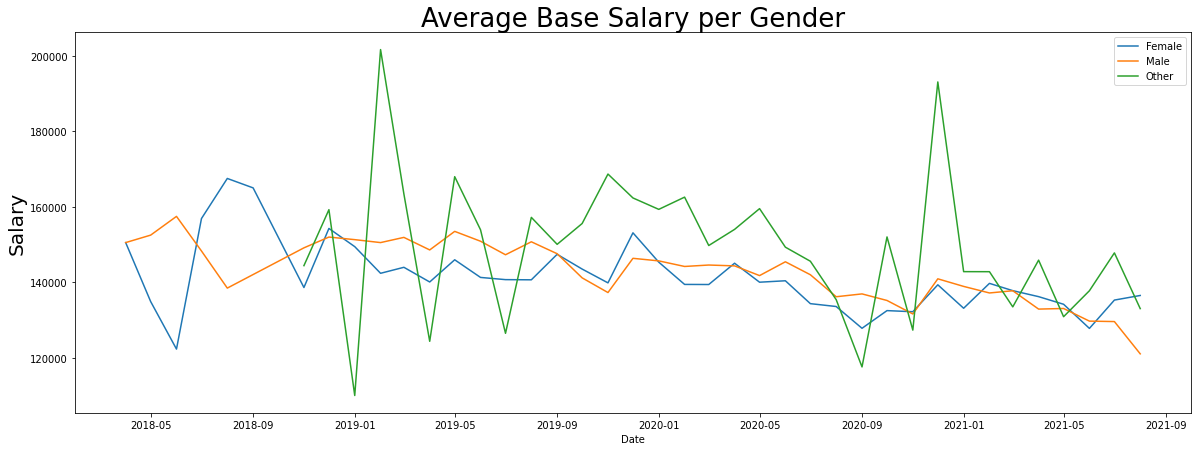

In [177]:
fig, ax = plt.subplots(figsize=(20, 7))
female_salary.plot(x="date", ax=ax, legend="Female")
male_salary.plot(x="date", ax=ax, legend="Male")
othergender_salary.plot(x="date", ax=ax, legend="Other")
plt.title("Average Base Salary per Gender", fontsize=26)
plt.xlabel("Date")
plt.ylabel("Salary", fontsize=20)
plt.legend(labels=["Female", "Male", "Other"], loc='best')
plt.show()

## Plotting Average Salaries per Gender grouped by Day

In [207]:
# filter out null gender values
filtered_data = data.filter(data["gender"].isin(["Male", "Female", "Other"]))

# group by date and gender
grouped_data = filtered_data.groupby('date', 'gender').mean('basesalary')

# round the avg basesalary
rounded_data = grouped_data.withColumn("avg(basesalary)", F.round(grouped_data["avg(basesalary)"], 2))

In [208]:
female_salary = rounded_data.filter(data["gender"]=="Female").toPandas()
male_salary = rounded_data.filter(data["gender"]=="Male").toPandas()
othergender_salary = rounded_data.filter(data["gender"]=="Other").toPandas()

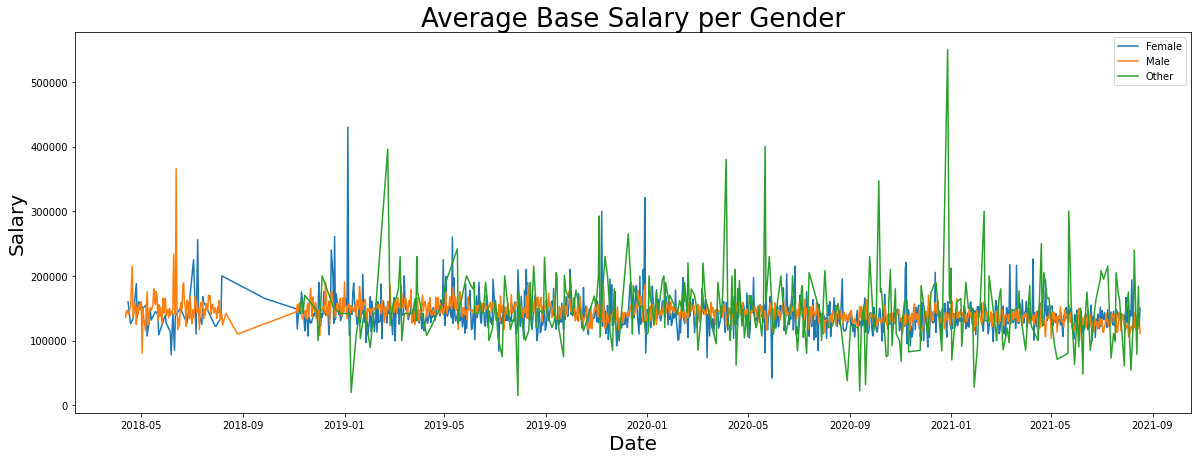

In [209]:
fig, ax = plt.subplots(figsize=(20, 7))
female_salary.plot(x="date", ax=ax, legend="Female")
male_salary.plot(x="date", ax=ax, legend="Male")
othergender_salary.plot(x="date", ax=ax, legend="Other")
plt.title("Average Base Salary per Gender", fontsize=26)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Salary", fontsize=20)
plt.legend(labels=["Female", "Male", "Other"], loc='best')
plt.show()

More prominent spikes for the gender "other", this could be due to the small number of employees that are of this gender. As the data is grouped by day (less of each gender in a grouping), this has shown that large salaries achieved by underrepresented genders are more obvious in the graph. 

## Plotting Average Salaries per Race

In [105]:
# Using the date_time variable that has been declared in the previous sections

date_data.show(10)

+----+-----+------+----+----------+----------+
|year|month|gender|race|basesalary|      date|
+----+-----+------+----+----------+----------+
|2017|    6|    NA|  NA|    107000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    155000|06/01/2017|
|2017|    6|    NA|  NA|    157000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    180000|06/01/2017|
|2017|    6|    NA|  NA|    135000|06/01/2017|
|2017|    6|    NA|  NA|    141907|06/01/2017|
|2017|    6|    NA|  NA|    157000|06/01/2017|
+----+-----+------+----+----------+----------+
only showing top 10 rows



In [109]:
# Filter datasets to exclude null values, and calculate mean salary and round to two decimal places
filtered_data = date_data.filter(data["race"]!="NA")
salary_per_race = filtered_data.groupby("date", "race").mean("basesalary")
rounded_data = salary_per_race.withColumn("avg(basesalary)", F.round(salary_per_race["avg(basesalary)"], 2))

In [178]:
clean_date = rounded_data.select(to_date(col("date"),"MM/dd/yyyy").alias("date"), "race", "avg(basesalary)")

In [181]:
clean_date.show()

+----------+-----------+---------------+
|      date|       race|avg(basesalary)|
+----------+-----------+---------------+
|2021-01-01|      Asian|       133699.2|
|2020-12-01|Two Or More|      159886.36|
|2020-11-01|      White|       132797.4|
|2020-05-01|      White|       126000.0|
|2019-06-01|      White|       165000.0|
|2019-12-01|      Asian|       110000.0|
|2021-01-01|      Black|       118500.0|
|2021-04-01|      Black|      129219.51|
|2019-10-01|      Asian|       170000.0|
|2021-02-01|      Asian|      135228.98|
|2020-10-01|      Black|      130228.07|
|2020-10-01|   Hispanic|      129351.06|
|2020-12-01|      Asian|      137444.27|
|2020-07-01|      Asian|      142692.02|
|2021-07-01|      Asian|      127588.53|
|2020-09-01|      Asian|       131825.8|
|2020-01-01|      Asian|       210000.0|
|2021-06-01|Two Or More|      140362.07|
|2021-08-01|Two Or More|      132621.62|
|2020-11-01|   Hispanic|      132069.44|
+----------+-----------+---------------+
only showing top

In [182]:
two_salary = clean_date.filter(data["race"]=="Two Or More").toPandas()
white_salary = clean_date.filter(data["race"]=="White").toPandas()
black_salary = clean_date.filter(data["race"]=="Black").toPandas()
hispanic_salary = clean_date.filter(data["race"]=="Hispanic").toPandas()
asian_salary = clean_date.filter(data["race"]=="Asian").toPandas()

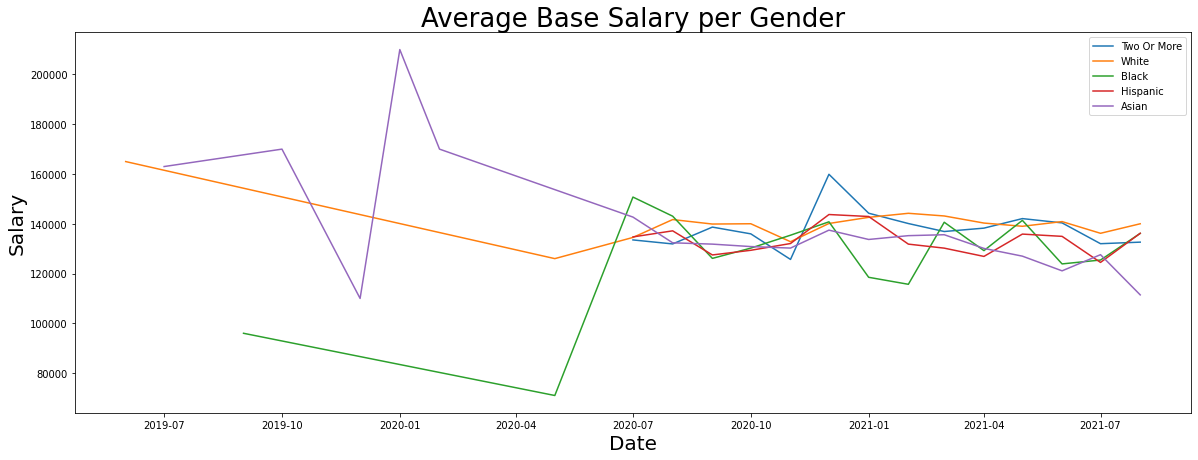

In [205]:
fig, ax = plt.subplots(figsize=(20, 7))
two_salary.plot(x="date", ax=ax)
white_salary.plot(x="date", ax=ax)
black_salary.plot(x="date", ax=ax)
hispanic_salary.plot(x="date", ax=ax)
asian_salary.plot(x="date", ax=ax)
plt.title("Average Base Salary per Gender", fontsize=26)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Salary", fontsize=20)
plt.legend(labels=["Two Or More", "White", "Black", "Hispanic", "Asian"], loc='best')
plt.show()

## Identifying Gender Differences per Job Position 

In [123]:
# Analysing the top 10 positions for gender differences using methods in previous analysis
all_titles = data.groupby("title").count()
all_titles.sort(col("count").desc())
most_common_titles = all_titles.sort(col("count").desc()).limit(10)
most_common_titles_list = most_common_titles.rdd.map(lambda x: x[0]).collect()

In [124]:
grouped_data = data.groupby('title', 'gender').mean('basesalary')

In [153]:
filtered_data = grouped_data.filter(grouped_data['title'].isin(most_common_titles_list)).toPandas()

In [138]:
female_data = filtered_data.filter(filtered_data['gender']=="Female")
male_data = filtered_data.filter(filtered_data['gender']=="Male")
other_data = filtered_data.filter(filtered_data['gender']=="Other")

In [157]:
# Reassigning the title values as integers for easier graphing
titles_dict = {}
for index in range(1, 11):
    titles_dict[most_common_titles_list[index-1]] = index
    
# Applying this change to the pandas dataframe
filtered_data['title'] = filtered_data['title'].replace(titles_dict)

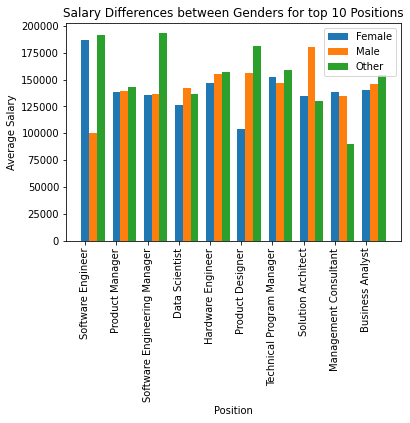

In [191]:
ind = np.arange(10)
width = 0.25

plt.bar(ind, female_data['avg(basesalary)'], width=width)
plt.bar(ind+width, male_data['avg(basesalary)'], width=width)
plt.bar(ind+(2*width), other_data['avg(basesalary)'], width=width)

plt.xticks(ticks=ind, labels=most_common_titles_list, rotation=90)
plt.title("Salary Differences between Genders for top 10 Positions")
plt.xlabel("Position")
plt.ylabel("Average Salary")
plt.legend(labels=["Female", "Male", "Other"], loc="best");

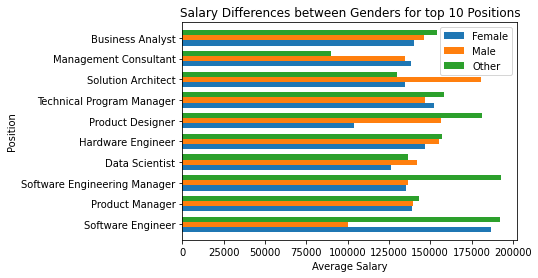

In [204]:
fig, ax = plt.subplots()
ax.barh(ind, female_data['avg(basesalary)'], width, label='Female')
ax.barh(ind + width, male_data['avg(basesalary)'], width, label='Male')
ax.barh(ind + (2*width), other_data['avg(basesalary)'], width, label='Other')

ax.set(yticks=ind + width, 
       yticklabels=most_common_titles_list, 
       ylim=[2*width - 1, len(most_common_titles_list)],
      title="Salary Differences between Genders for top 10 Positions",
      xlabel="Average Salary",
      ylabel="Position")
ax.legend();